<a href="https://colab.research.google.com/github/lorenzrossi/InfoRet_SemanticSimilarity/blob/main/InfoRet_Semantic_Similarity_DATA_EXPLORATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.metrics import classification_report, confusion_matrix
import shutil 
import sys

!pip install opendatasets
import opendatasets as op

import os

# NLTK
import nltk as nlp
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
nlp.download('stopwords')
nlp.download('popular')
stop_words = stopwords.words('english')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Down

In [17]:
!wget https://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip
op.download("https://www.kaggle.com/datasets/stanfordu/stanford-natural-language-inference-corpus")

# bcc30972b8b9f25c2bc6c0a46d8f4d62

--2023-01-23 16:47:52--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-01-23 16:47:52--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

glove.6B.zip.1      100%[===================>] 822.24M  5.03MB/s    in 2m 39s  

2023-01-23 16:50:31 (5.18 MB/s) - ‘glove.6B.zip.1’ saved [862182613/862182613]

Archive:  glove.6B.zip
replace glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: glo

In [18]:
dataset_folder = "stanford-natural-language-inference-corpus"
train_raw = pd.read_csv(os.path.join(dataset_folder, "snli_1.0_train.csv"))
test_raw = pd.read_csv(os.path.join(dataset_folder, "snli_1.0_test.csv"))
eval_raw = pd.read_csv(os.path.join(dataset_folder, "snli_1.0_dev.csv"))

In [19]:
train_raw.head(3)

,gold_label,sentence1_binary_parse,sentence2_binary_parse,sentence1_parse,sentence2_parse,sentence1,sentence2,captionID,pairID,label1,label2,label3,label4,label5
0,neutral,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,( ( A person ) ( ( is ( ( training ( his horse...,(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...,A person on a horse jumps over a broken down a...,A person is training his horse for a competition.,3416050480.jpg#4,3416050480.jpg#4r1n,neutral,NaN,NaN,NaN,NaN
1,contradiction,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,( ( A person ) ( ( ( ( is ( at ( a diner ) ) )...,(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette.",3416050480.jpg#4,3416050480.jpg#4r1c,contradiction,NaN,NaN,NaN,NaN
2,entailment,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,"( ( A person ) ( ( ( ( is outdoors ) , ) ( on ...",(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",3416050480.jpg#4,3416050480.jpg#4r1e,entailment,NaN,NaN,NaN,NaN


In [20]:
eval_raw.describe()

,gold_label,sentence1_binary_parse,sentence2_binary_parse,sentence1_parse,sentence2_parse,sentence1,sentence2,captionID,pairID,label1,label2,label3,label4,label5
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,9986
unique,4,3319,9818,3319,9818,3319,9819,3319,10000,3,3,3,3,3
top,entailment,( ( Two ( indian men ) ) ( ( are ( ( dancing (...,( There ( ( are ( ( multiple people ) present ...,(ROOT (S (NP (CD Two) (JJ indian) (NNS men)) (...,(ROOT (S (NP (EX There)) (VP (VBP are) (ADJP (...,Two indian men are dancing in suits with an in...,There are multiple people present.,3037283097.jpg#1,4705552913.jpg#2r1n,entailment,entailment,entailment,entailment,entailment
freq,3329,6,6,6,6,6,6,6,1,3334,3396,3390,3429,3429


In [21]:
test_raw.describe()

,gold_label,sentence1_binary_parse,sentence2_binary_parse,sentence1_parse,sentence2_parse,sentence1,sentence2,captionID,pairID,label1,label2,label3,label4,label5
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,9990
unique,4,3323,9810,3323,9810,3323,9810,3323,10000,3,3,3,3,3
top,entailment,( ( ( A man ) ( wearing ( a jacket ) ) ) ( ( i...,( There ( ( are ( ( multiple people ) present ...,(ROOT (S (NP (NP (DT A) (NN man)) (VP (VBG wea...,(ROOT (S (NP (EX There)) (VP (VBP are) (ADJP (...,A man wearing a jacket is listening to headpho...,There are multiple people present.,4479587916.jpg#1,2677109430.jpg#1r1n,neutral,entailment,entailment,entailment,entailment
freq,3368,6,7,6,7,6,7,6,1,3334,3400,3439,3549,3543


In [22]:
# Data shape and missing values
print('Train set: ' + str(train_raw.shape))
print(train_raw.isnull().sum())

print('Evaluation set: ' + str(eval_raw.shape))
print(eval_raw.isnull().sum())

print('Test set:' + str(test_raw.shape))
print(test_raw.isnull().sum())

Train set: (550152, 14)
gold_label                     0
sentence1_binary_parse         0
sentence2_binary_parse         6
sentence1_parse                0
sentence2_parse                0
sentence1                      0
sentence2                      6
captionID                      0
pairID                         0
label1                         0
label2                    510782
label3                    510757
label4                    510769
label5                    513238
dtype: int64
Evaluation set: (10000, 14)
gold_label                 0
sentence1_binary_parse     0
sentence2_binary_parse     0
sentence1_parse            0
sentence2_parse            0
sentence1                  0
sentence2                  0
captionID                  0
pairID                     0
label1                     0
label2                     0
label3                     0
label4                     0
label5                    14
dtype: int64
Test set:(10000, 14)
gold_label                 0
sent

In [23]:
# Propotion of gold labels (train only)
ratio_gold = train_raw['gold_label'].value_counts(normalize=True).sort_index(ascending=False).reset_index().set_index('index')
ratio_gold['gold_label'] = ratio_gold['gold_label'].apply(lambda x: round(x, 3))
ratio_gold

,gold_label
index,
neutral,0.332
entailment,0.333
contradiction,0.333
-,0.001


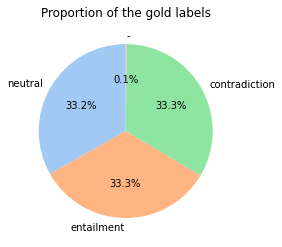

In [24]:
# Visualize the propotion
colors = sns.color_palette('pastel')
plt.pie(ratio_gold['gold_label'], labels=ratio_gold.index, colors=colors, autopct='%.1f%%', startangle=90)
plt.title('Proportion of the gold labels')
plt.show()

In [25]:
# Lengths of sentenses (train only)
# Sentense 1
train_sent1 = train_raw['sentence1'].str.count(' ')
train_sent1 = train_sent1.apply(lambda x: int(x))
print('Sentence 1\n', round(train_sent1.describe(), 2))

# Sentense 2
train_sent2 = train_raw['sentence2'].dropna().str.count(' ')
train_sent2 = train_sent2.apply(lambda x: int(x))
print('\nSentence 2\n', round(train_sent2.describe(), 2))

Sentence 1
 count    550152.00
mean         11.85
std           5.66
min           1.00
25%           8.00
50%          11.00
75%          15.00
max          77.00
Name: sentence1, dtype: float64

Sentence 2
 count    550146.00
mean          6.42
std           3.07
min           0.00
25%           4.00
50%           6.00
75%           8.00
max          57.00
Name: sentence2, dtype: float64


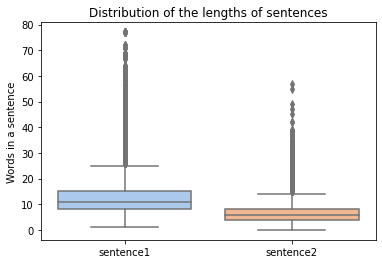

In [26]:
# Visualize the distribution of the lengths of sentences 1 and 2
train_sentences = pd.DataFrame({'sentence1':train_sent1,
                                'sentence2':train_sent2})

box = sns.boxplot(data=train_sentences, palette=colors)
box.set_ylabel('Words in a sentence')
box.set_title('Distribution of the lengths of sentences')
plt.show()

In [27]:
# Examples in sentence 1
# Minimum count of words
example1_min = train_sent1[train_sent1 == train_sent1.min()].sample(1)
print('Min word count: ', train_sent1.min())
print('Example: ', train_raw['sentence1'].loc[example1_min.index])
print('\n')

# Maximum count of words
example1_max = train_sent1[train_sent1 == train_sent1.max()].sample(1)
print('Max word count: ', train_sent1.max())
print('Example: ', train_raw['sentence1'].loc[example1_max.index])

# Examples in sentence 2
# Minimum count of words
example2_min = train_sent2[train_sent2 == train_sent2.min()].sample(1)
print('Min word count: ', train_sent2.min())
print('Example: ', train_raw['sentence2'].loc[example2_min.index])
print('\n')

# Maximum count of words
example2_max = train_sent2[train_sent2 == train_sent2.max()].sample(1)
print('Max word count: ', train_sent2.max())
print('Example: ', train_raw['sentence2'].loc[example2_max.index])

Min word count:  1
Example:  25837    a cyclist
Name: sentence1, dtype: object


Max word count:  77
Example:  37573    A man wearing a helmet, red pants with white s...
Name: sentence1, dtype: object
Min word count:  0
Example:  223592    f
Name: sentence2, dtype: object


Max word count:  57
Example:  467829    The cat toys with the catastrophically injured...
Name: sentence2, dtype: object


In [28]:
# Omit rows having the gold label "-" and irrelevant columns 
train = train_raw[['gold_label', 'sentence1', 'sentence2']][train_raw['gold_label'] != '-'].set_index(train_raw['pairID'][train_raw['gold_label'] != '-'])
eval = eval_raw[['gold_label', 'sentence1', 'sentence2']][eval_raw['gold_label'] != '-'].set_index(eval_raw['pairID'][eval_raw['gold_label'] != '-'])
test = test_raw[['gold_label', 'sentence1', 'sentence2']][test_raw['gold_label'] != '-'].set_index(test_raw['pairID'][test_raw['gold_label'] != '-'])

# Omit null indexes

total = [train, eval, test]
for df in total:
  df = df.dropna(subset=['sentence1','sentence2'], inplace=True)


#train.dropna(subset=['sentence2'], inplace=True)

# Recheck the number of null values
print(train.isnull().sum())
print(eval.isnull().sum())
print(test.isnull().sum())

#train = train.sample(frac=0.5)
#eval = eval.sample(frac=0.2048)
#test = test.sample(frac=0.2048)
#
#train.head(3)

gold_label    0
sentence1     0
sentence2     0
dtype: int64
gold_label    0
sentence1     0
sentence2     0
dtype: int64
gold_label    0
sentence1     0
sentence2     0
dtype: int64


# Frequency Analysis

NOTE: datasets will be sampled when using the models. Otherwise computations will be too heavy and they will take too much time.
We rely ont the statistical assumption that the distribution of words in the sample will be the same as in the whole dataset.

In [29]:
def tokenize(sentence):
    # Tokenization
    new_tokens = word_tokenize(sentence)
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens = [t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]

    # Lemmatization (become, becomes, becoming, became --> become)
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
    return new_tokens

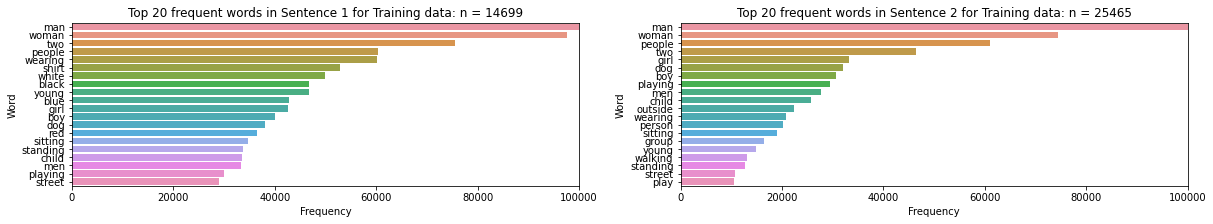

In [30]:
# Connect all sentences in the preprocessed training set
train_sentence1 = " ".join(train['sentence1'])
token_s1 = tokenize(train_sentence1)

train_sentence2 = " ".join(train['sentence2'])
token_s2 = tokenize(train_sentence2)

# Visualization of frequent words in the train dataset
# Count the words
count_s1 = Counter(token_s1)
word_freq_s1 = pd.DataFrame(count_s1.items(), columns=['Word','Frequency']).sort_values(by='Frequency', ascending=False)

count_s2 = Counter(token_s2)
word_freq_s2 = pd.DataFrame(count_s2.items(), columns=['Word','Frequency']).sort_values(by='Frequency', ascending=False)

# Create subplots
nb_ranking = 20
fig = plt.figure(figsize=(20, 3))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.barplot(x='Frequency', y='Word', data=word_freq_s1.head(nb_ranking), ax=ax1).set(xlim=(0, 100000))
ax1.set_title('Top ' + str(nb_ranking) + ' frequent words in Sentence 1 for Training data: n = ' + str(len(word_freq_s1)))

sns.barplot(x='Frequency', y='Word', data=word_freq_s2.head(nb_ranking), ax=ax2).set(xlim=(0, 100000))
ax2.set_title('Top ' + str(nb_ranking) + ' frequent words in Sentence 2 for Training data: n = ' + str(len(word_freq_s2)))

plt.show()

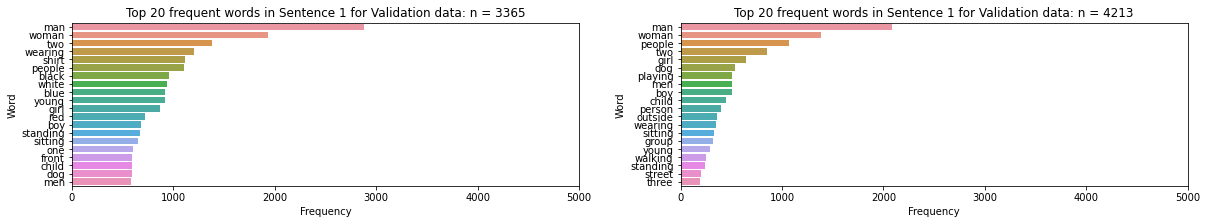

In [35]:
# WE REPEAT THE SAME PROCEDURES OF THE WORDS OF THE TRAINING DATA WITH VALIDATION AND TEST DATASETS

# Connect all sentences in the preprocessed validation set
eval_sentence1 = " ".join(eval['sentence1'])
token_s1 = tokenize(eval_sentence1)

eval_sentence2 = " ".join(eval['sentence2'])
token_s2 = tokenize(eval_sentence2)

# Visualization of frequent words in the validation dataset
# Count the words
count_s1 = Counter(token_s1)
word_freq_s1 = pd.DataFrame(count_s1.items(), columns=['Word','Frequency']).sort_values(by='Frequency', ascending=False)

count_s2 = Counter(token_s2)
word_freq_s2 = pd.DataFrame(count_s2.items(), columns=['Word','Frequency']).sort_values(by='Frequency', ascending=False)

# Create subplots
nb_ranking = 20
fig = plt.figure(figsize=(20, 3))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.barplot(x='Frequency', y='Word', data=word_freq_s1.head(nb_ranking), ax=ax1).set(xlim=(0, 5000))
ax1.set_title('Top ' + str(nb_ranking) + ' frequent words in Sentence 1 for Validation data: n = ' + str(len(word_freq_s1)))

sns.barplot(x='Frequency', y='Word', data=word_freq_s2.head(nb_ranking), ax=ax2).set(xlim=(0, 5000))
ax2.set_title('Top ' + str(nb_ranking) + ' frequent words in Sentence 1 for Validation data: n = ' + str(len(word_freq_s2)))

plt.show()

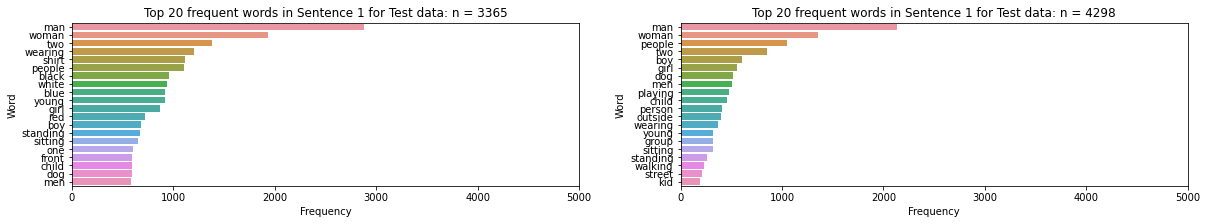

In [34]:
# Connect all sentences in the preprocessed test set
test_sentence1 = " ".join(test['sentence1'])
token_s1 = tokenize(eval_sentence1)

test_sentence2 = " ".join(test['sentence2'])
token_s2 = tokenize(test_sentence2)

# Visualization of frequent words in the test dataset
# Count the words
count_s1 = Counter(token_s1)
word_freq_s1 = pd.DataFrame(count_s1.items(), columns=['Word','Frequency']).sort_values(by='Frequency', ascending=False)

count_s2 = Counter(token_s2)
word_freq_s2 = pd.DataFrame(count_s2.items(), columns=['Word','Frequency']).sort_values(by='Frequency', ascending=False)

# Create subplots
nb_ranking = 20
fig = plt.figure(figsize=(20, 3))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.barplot(x='Frequency', y='Word', data=word_freq_s1.head(nb_ranking), ax=ax1).set(xlim=(0, 5000))
ax1.set_title('Top ' + str(nb_ranking) + ' frequent words in Sentence 1 for Test data: n = ' + str(len(word_freq_s1)))

sns.barplot(x='Frequency', y='Word', data=word_freq_s2.head(nb_ranking), ax=ax2).set(xlim=(0, 5000))
ax2.set_title('Top ' + str(nb_ranking) + ' frequent words in Sentence 1 for Test data: n = ' + str(len(word_freq_s2)))

plt.show()